<a href="https://colab.research.google.com/github/oanhnguyen-mba/python-usecase-customer_segmentation/blob/main/demo_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample Data:
   CustomerID  Recency  Frequency  Monetary
0           1      103          2       694
1           2      349          3        29
2           3      271         49       330
3           4      107         37       785
4           5       72         49       521


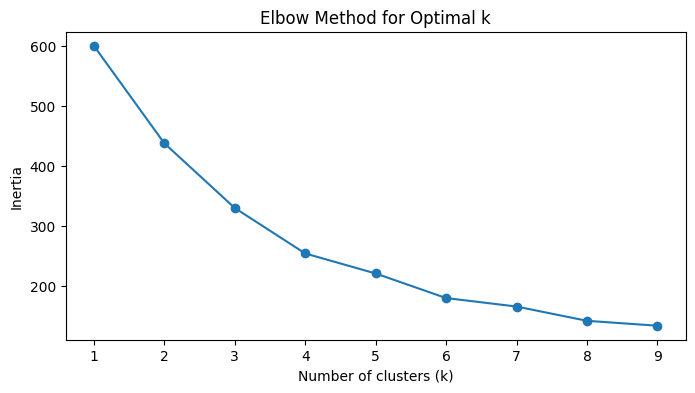

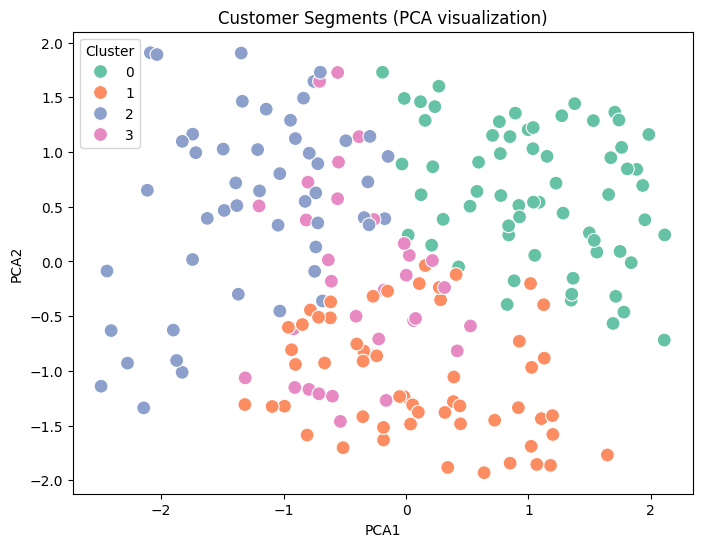


Cluster Summary:
            Recency  Frequency    Monetary
Cluster                                   
0        272.365079  35.682540  719.793651
1         83.392857  34.571429  470.892857
2        223.795918  15.897959  199.857143
3        156.187500   8.093750  753.781250


In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Simulate RFM dataset
np.random.seed(42)
n_customers = 200

data = pd.DataFrame({
    'CustomerID': range(1, n_customers + 1),
    'Recency': np.random.randint(1, 365, n_customers),     # days since last purchase
    'Frequency': np.random.randint(1, 50, n_customers),    # number of purchases
    'Monetary': np.random.randint(10, 1000, n_customers)   # total spend
})

print("Sample Data:")
print(data.head())

# 2. Standardize RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(data[['Recency', 'Frequency', 'Monetary']])

# 3. Determine optimal number of clusters (Elbow Method)
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

# 4. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(rfm_scaled)

# 5. Visualize clusters using PCA
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)
data['PCA1'] = rfm_pca[:, 0]
data['PCA2'] = rfm_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='Set2', s=100)
plt.title('Customer Segments (PCA visualization)')
plt.show()

# 6. Analyze clusters
cluster_summary = data.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
print("\nCluster Summary:")
print(cluster_summary)